In [1]:
%run -m ipy_startup
%run -m ipy_logging
%run -m ipy_plotly
%run -m ipy_seaborn
%matplotlib inline
import math
from musc_genomics import data
from musc_genomics.data_modeling import modeling, features, prepared

2016-08-06 20:24:50,418:INFO:requests.packages.urllib3.connectionpool: Starting new HTTPS connection (1): api.plot.ly


In [2]:
d, na_summary, fill_summary, imp_summary = prepared.get_modeling_data_01('maximal_02', impute_response=False)

2016-08-06 20:24:52,328:DEBUG:research.project.manager: Loading saved data from location "/Users/eczech/data/research/musc_genomics/features/encode_maximal_02.pkl"


Removing 102 response fields of 252 due to sparsity
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 583 entries, (22RV1, PRAD, prostate, carcinoma) to (ZR7530, BRCA, breast, carcinoma)
Columns: 150 entries, RES:ABL signaling:ABL:AP-24534 to RES:p53 pathway:MDMX:NSC-207895
dtypes: float64(150)
memory usage: 687.8+ KB


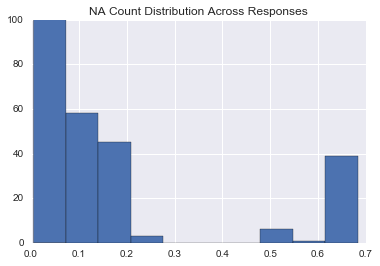

In [38]:
d_res = features.remove_sparse_responses(d, threshold=.1).filter(regex='^RES:')
d_res.info()

## Check for Target Drugs

In [39]:
c_drug = ['Navitoclax', 'Nutlin', 'AG-014699', 'PD-0332991', 'PLX4720', 'SB590885']
d_res = d.filter(regex='^RES:')
for c in c_drug:
    matches = d_res.filter(regex=c).columns.tolist()
    print('Matches for search "{}" = {}'.format(c, matches))

Matches for search "Navitoclax" = ['RES:apoptosis regulation:BCL-2, BCL-XL, BCL-W:Navitoclax']
Matches for search "Nutlin" = ['RES:p53 pathway:MDM2:Nutlin-3a (-)']
Matches for search "AG-014699" = ['RES:Genome integrity:PARP1, PARP2:AG-014699']
Matches for search "PD-0332991" = ['RES:cell cycle:CDK4, CDK6:PD-0332991']
Matches for search "PLX4720" = ['RES:ERK MAPK signaling:BRAF:PLX4720']
Matches for search "SB590885" = ['RES:ERK MAPK signaling:BRAF:SB590885']


## Sensitivity Correlations

In [40]:
# Compute correlation between response values and sort by response name, which is equivalent to sorting by pathway
d_cor = d_res.corr()
d_cor.columns = d_cor.columns.sort_values()

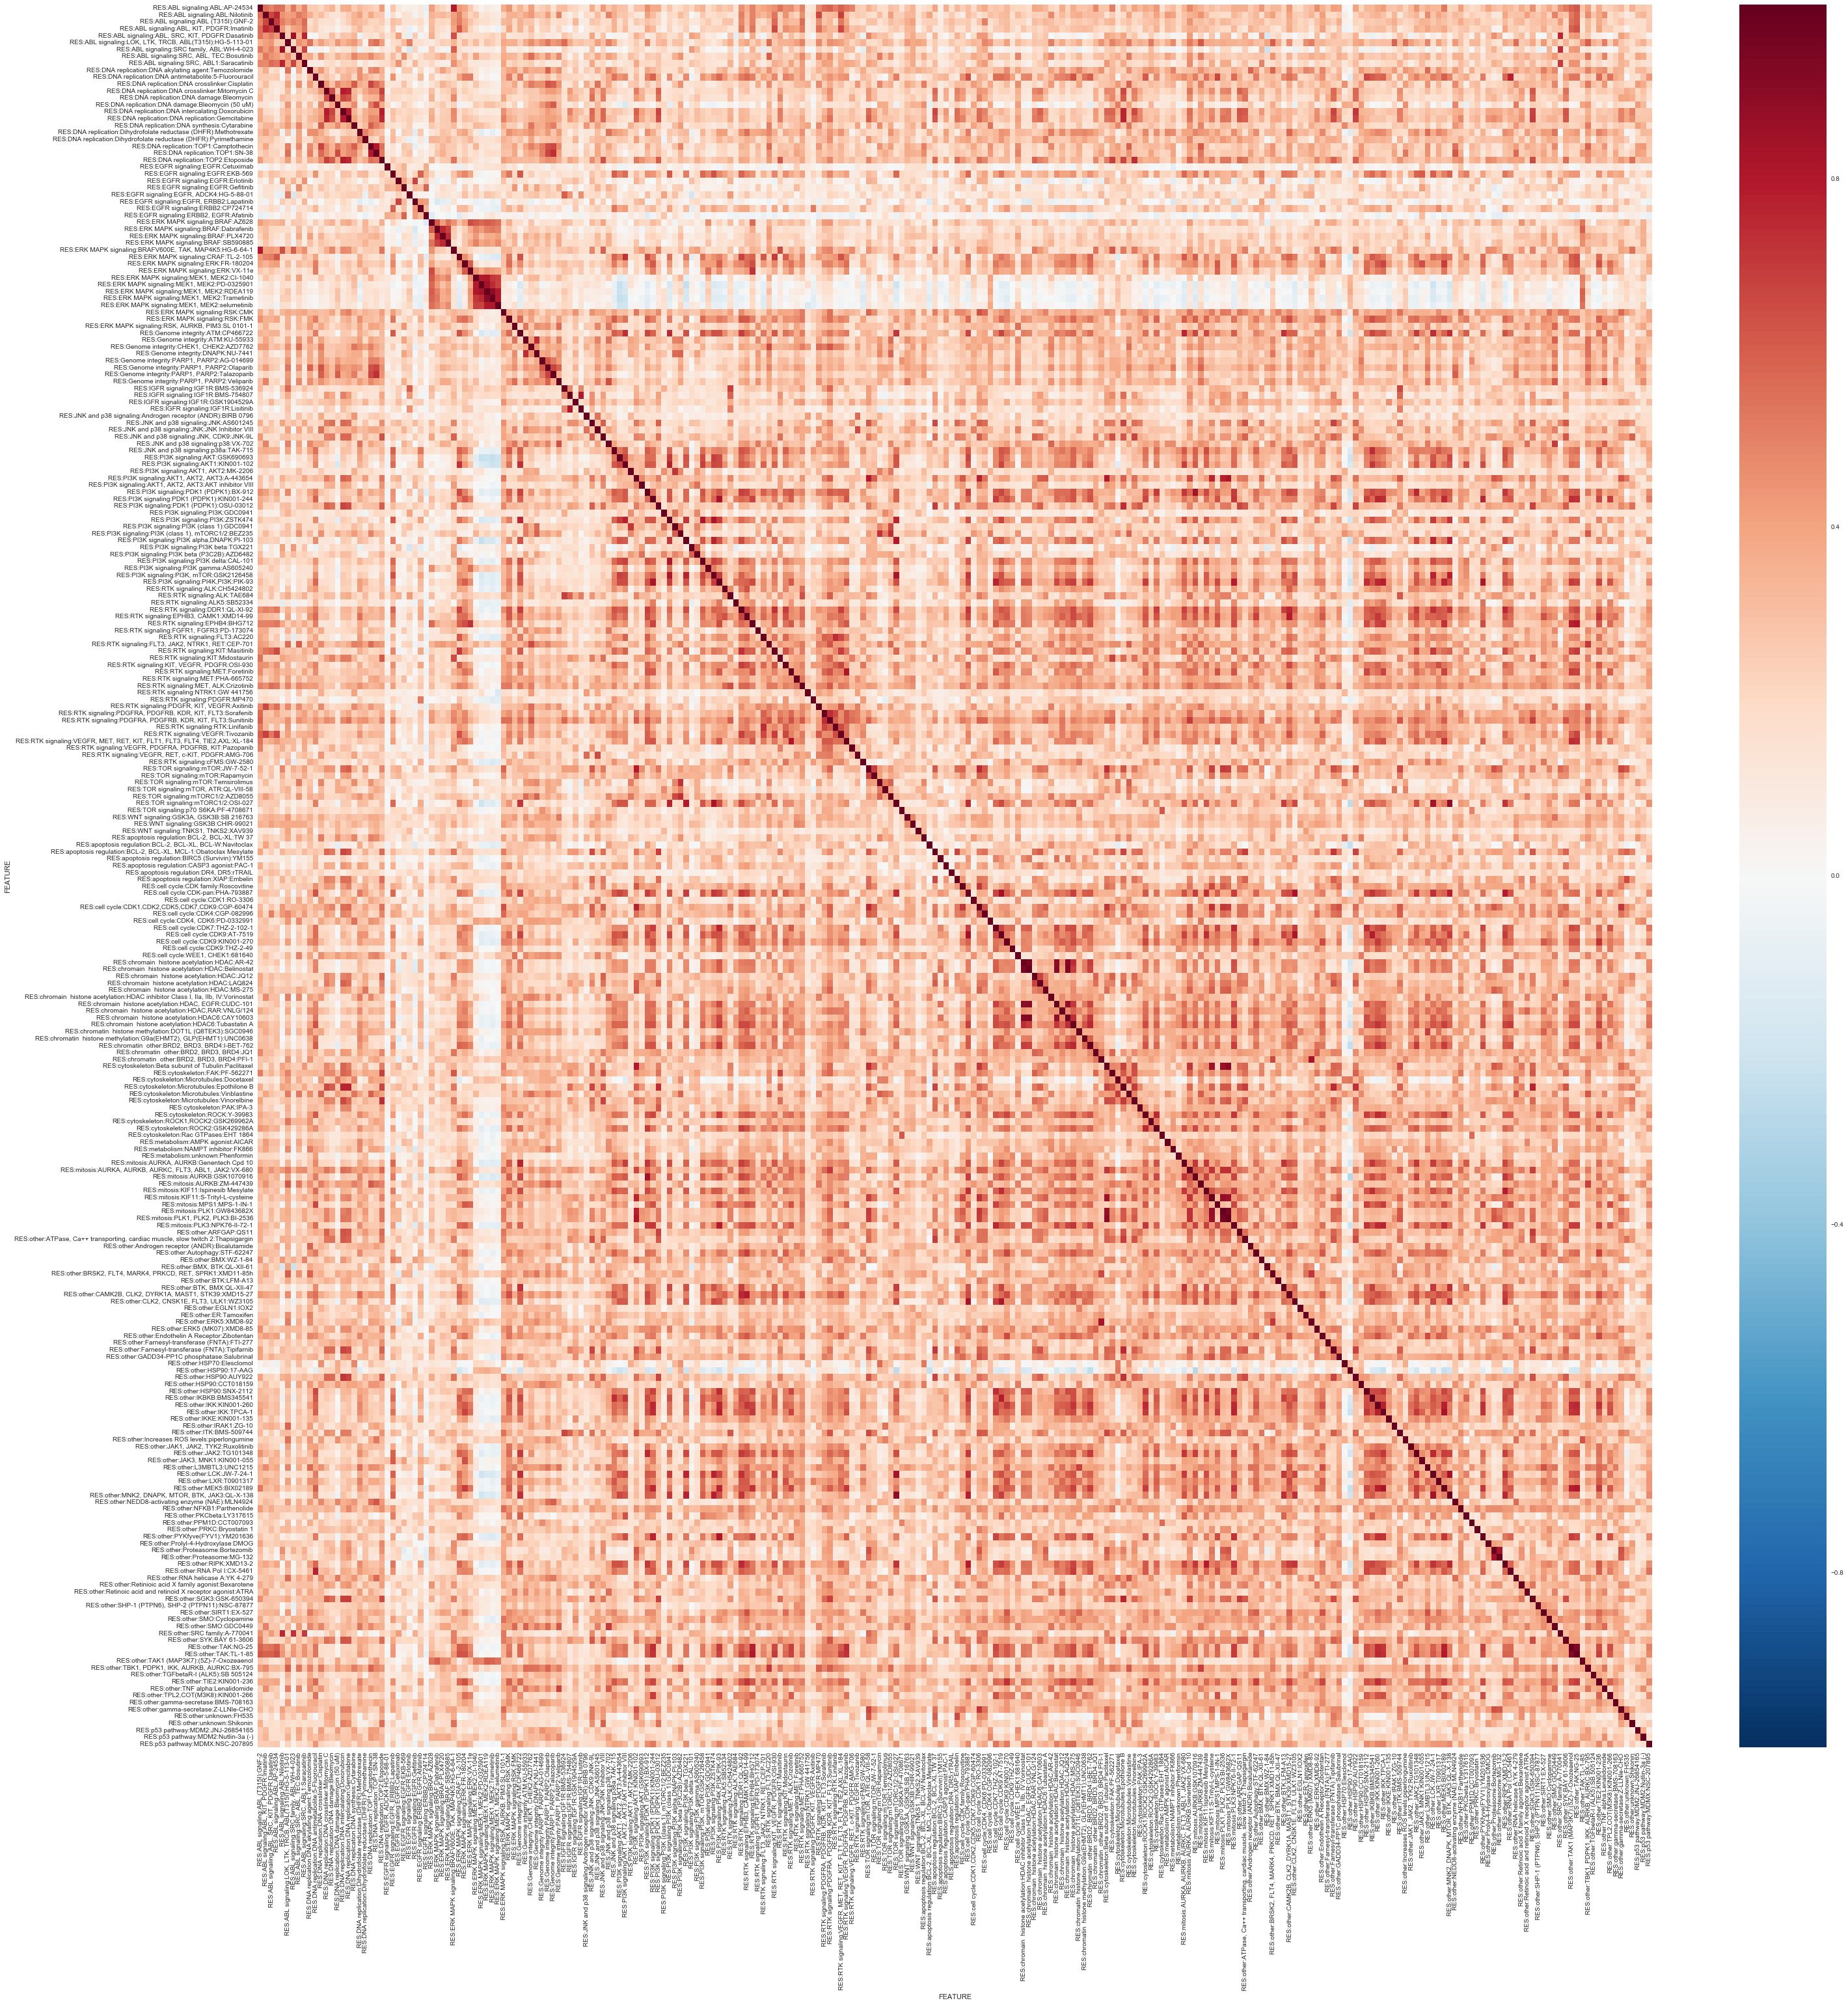

In [46]:
plt.figure(figsize=(48, 48))
sns.heatmap(d_cor)

### Correlation Clustered by Pathways

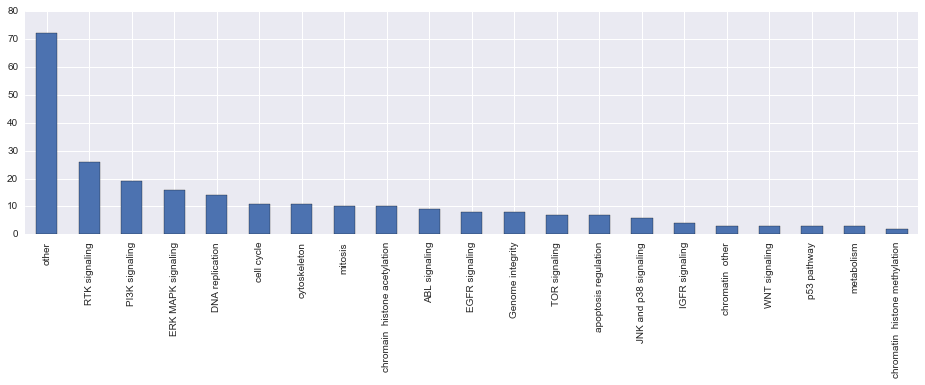

In [58]:
pathways = [c.split(':')[1] for c in d_cor]
pd.Series(pathways).value_counts().head(35).plot(kind='bar', figsize=(16,4))

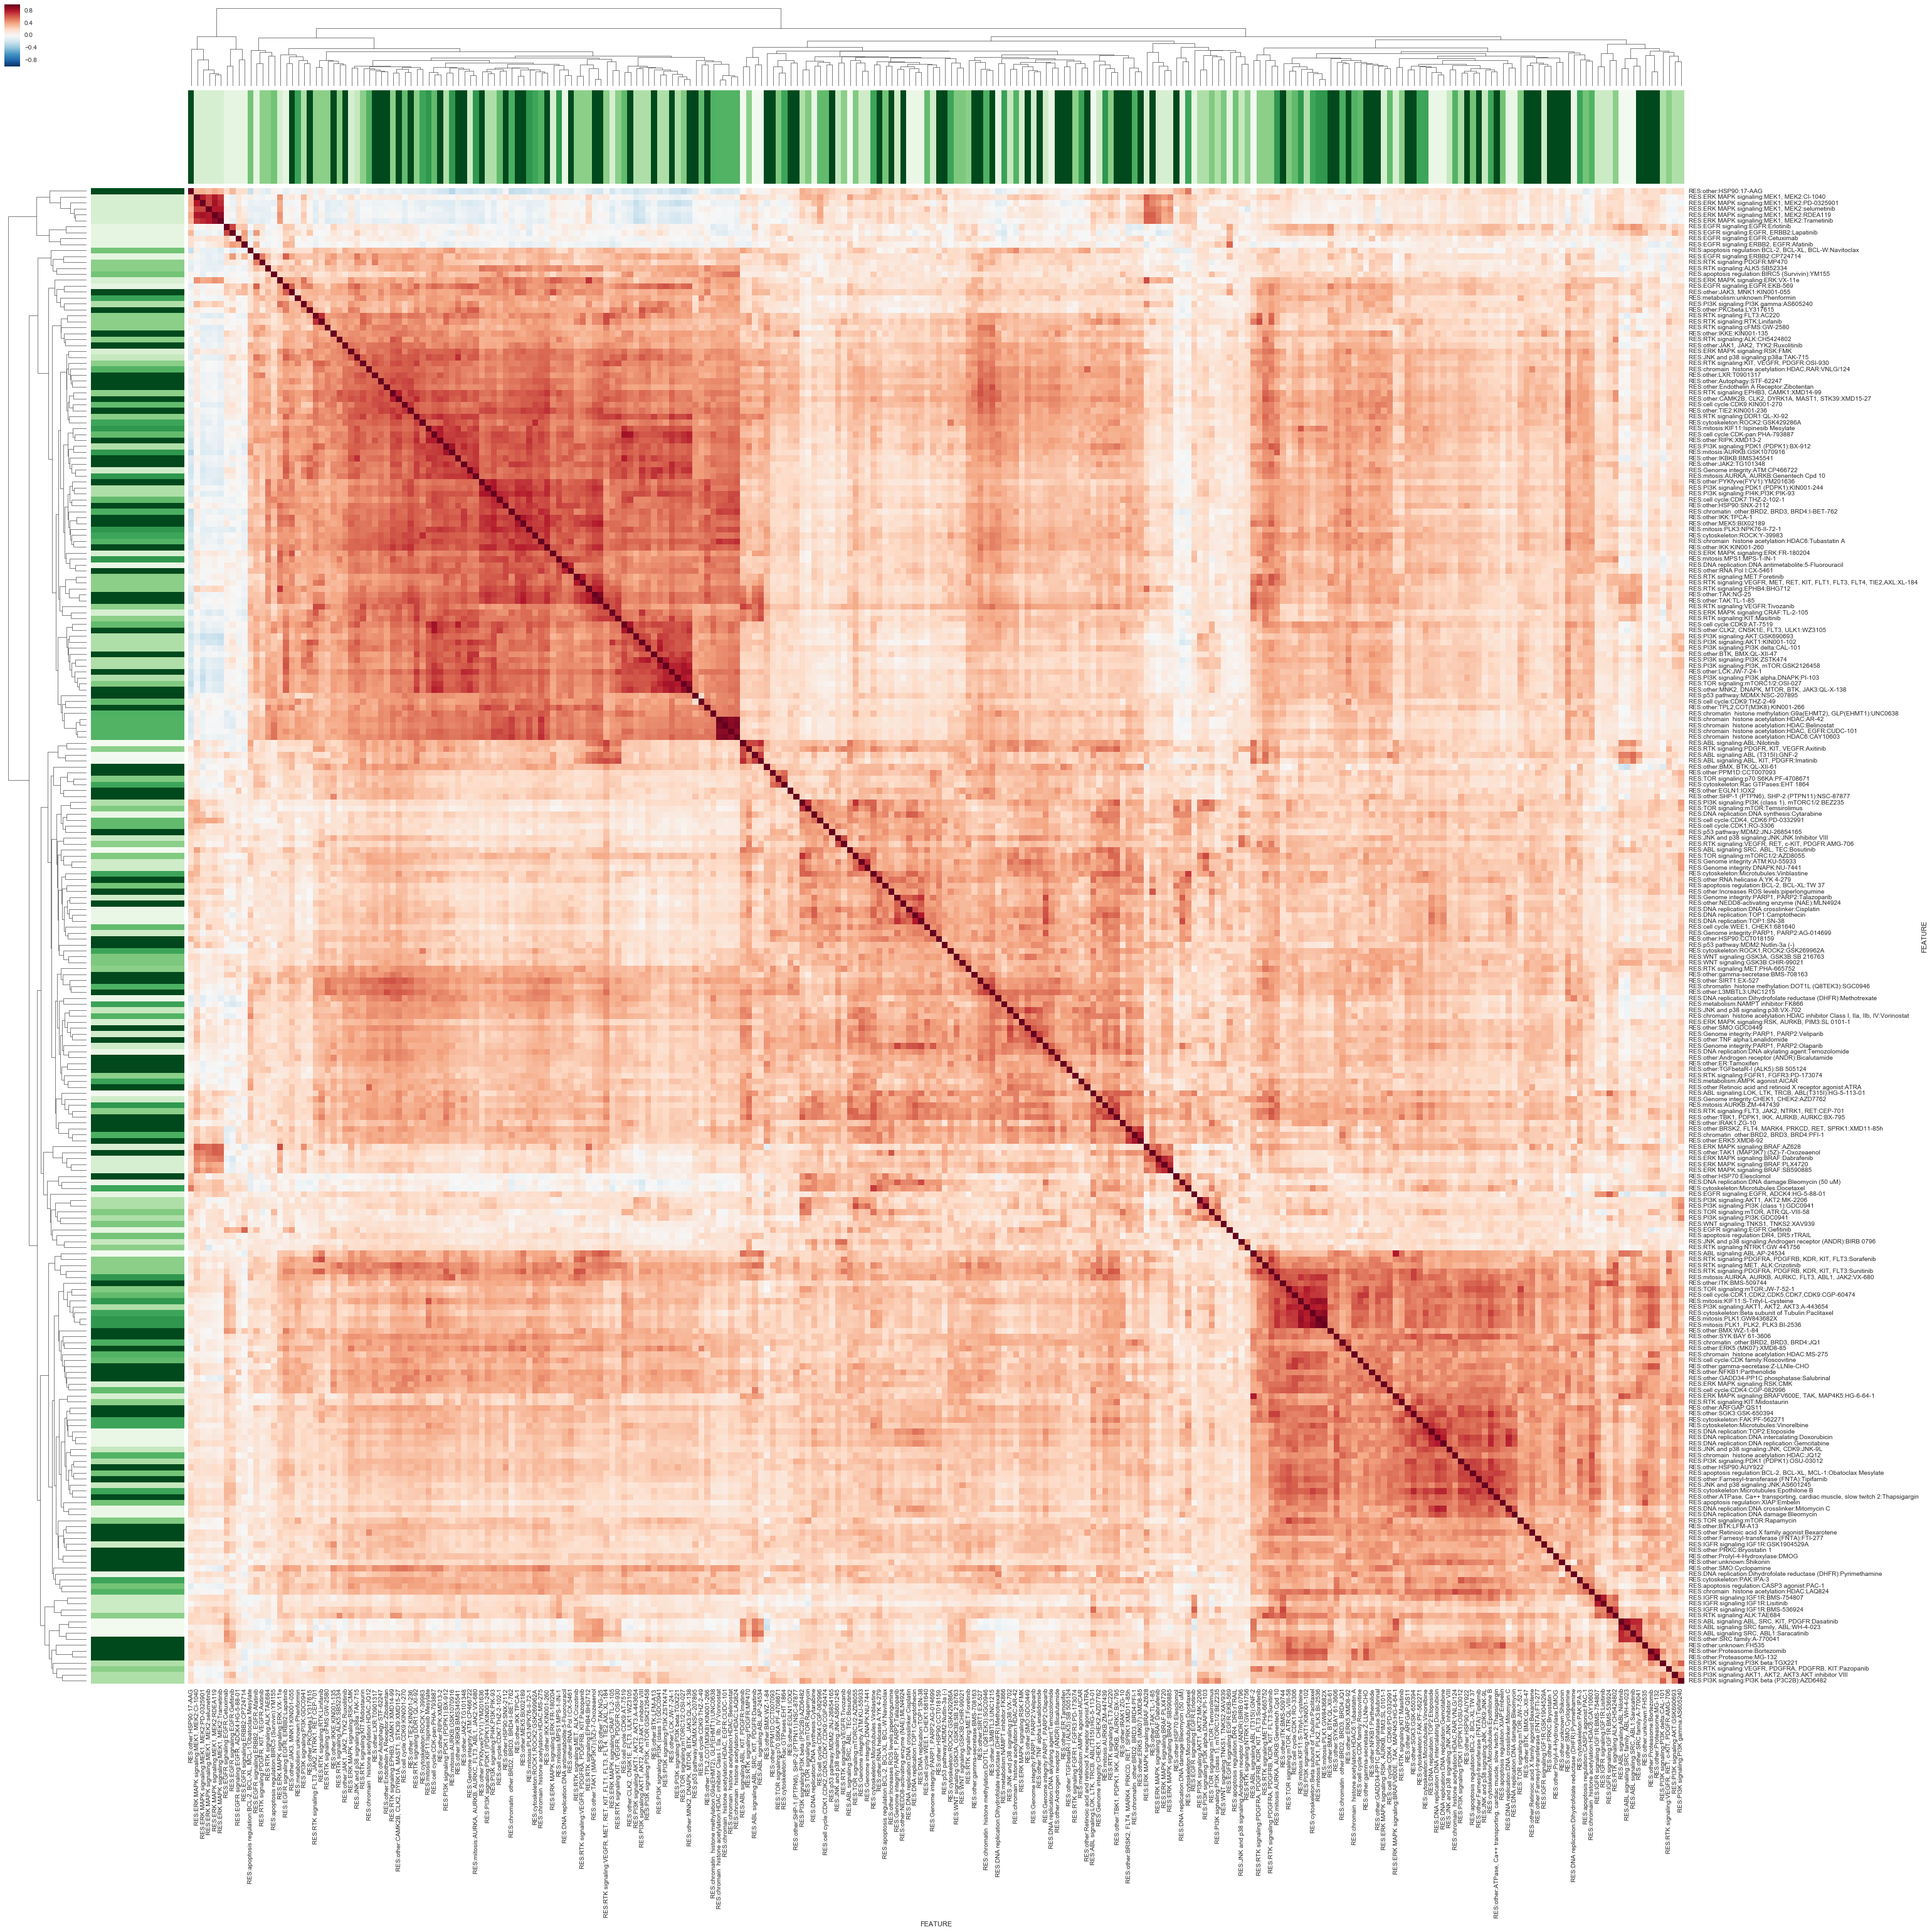

In [50]:
colors = sns.color_palette(palette='Greens', n_colors=len(pathways))

colors = pd.Series(pathways).map(dict(zip(pathways, colors)))
cg = sns.clustermap(d_cor, figsize=(48, 48), row_colors=colors, col_colors=colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

### Correlation Clustered by Target

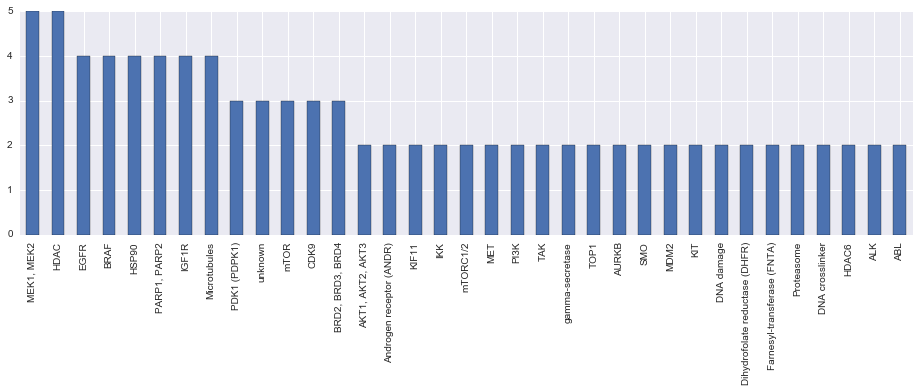

In [57]:
targets = [c.split(':')[2] for c in d_cor]
pd.Series(targets).value_counts().head(35).plot(kind='bar', figsize=(16,4))

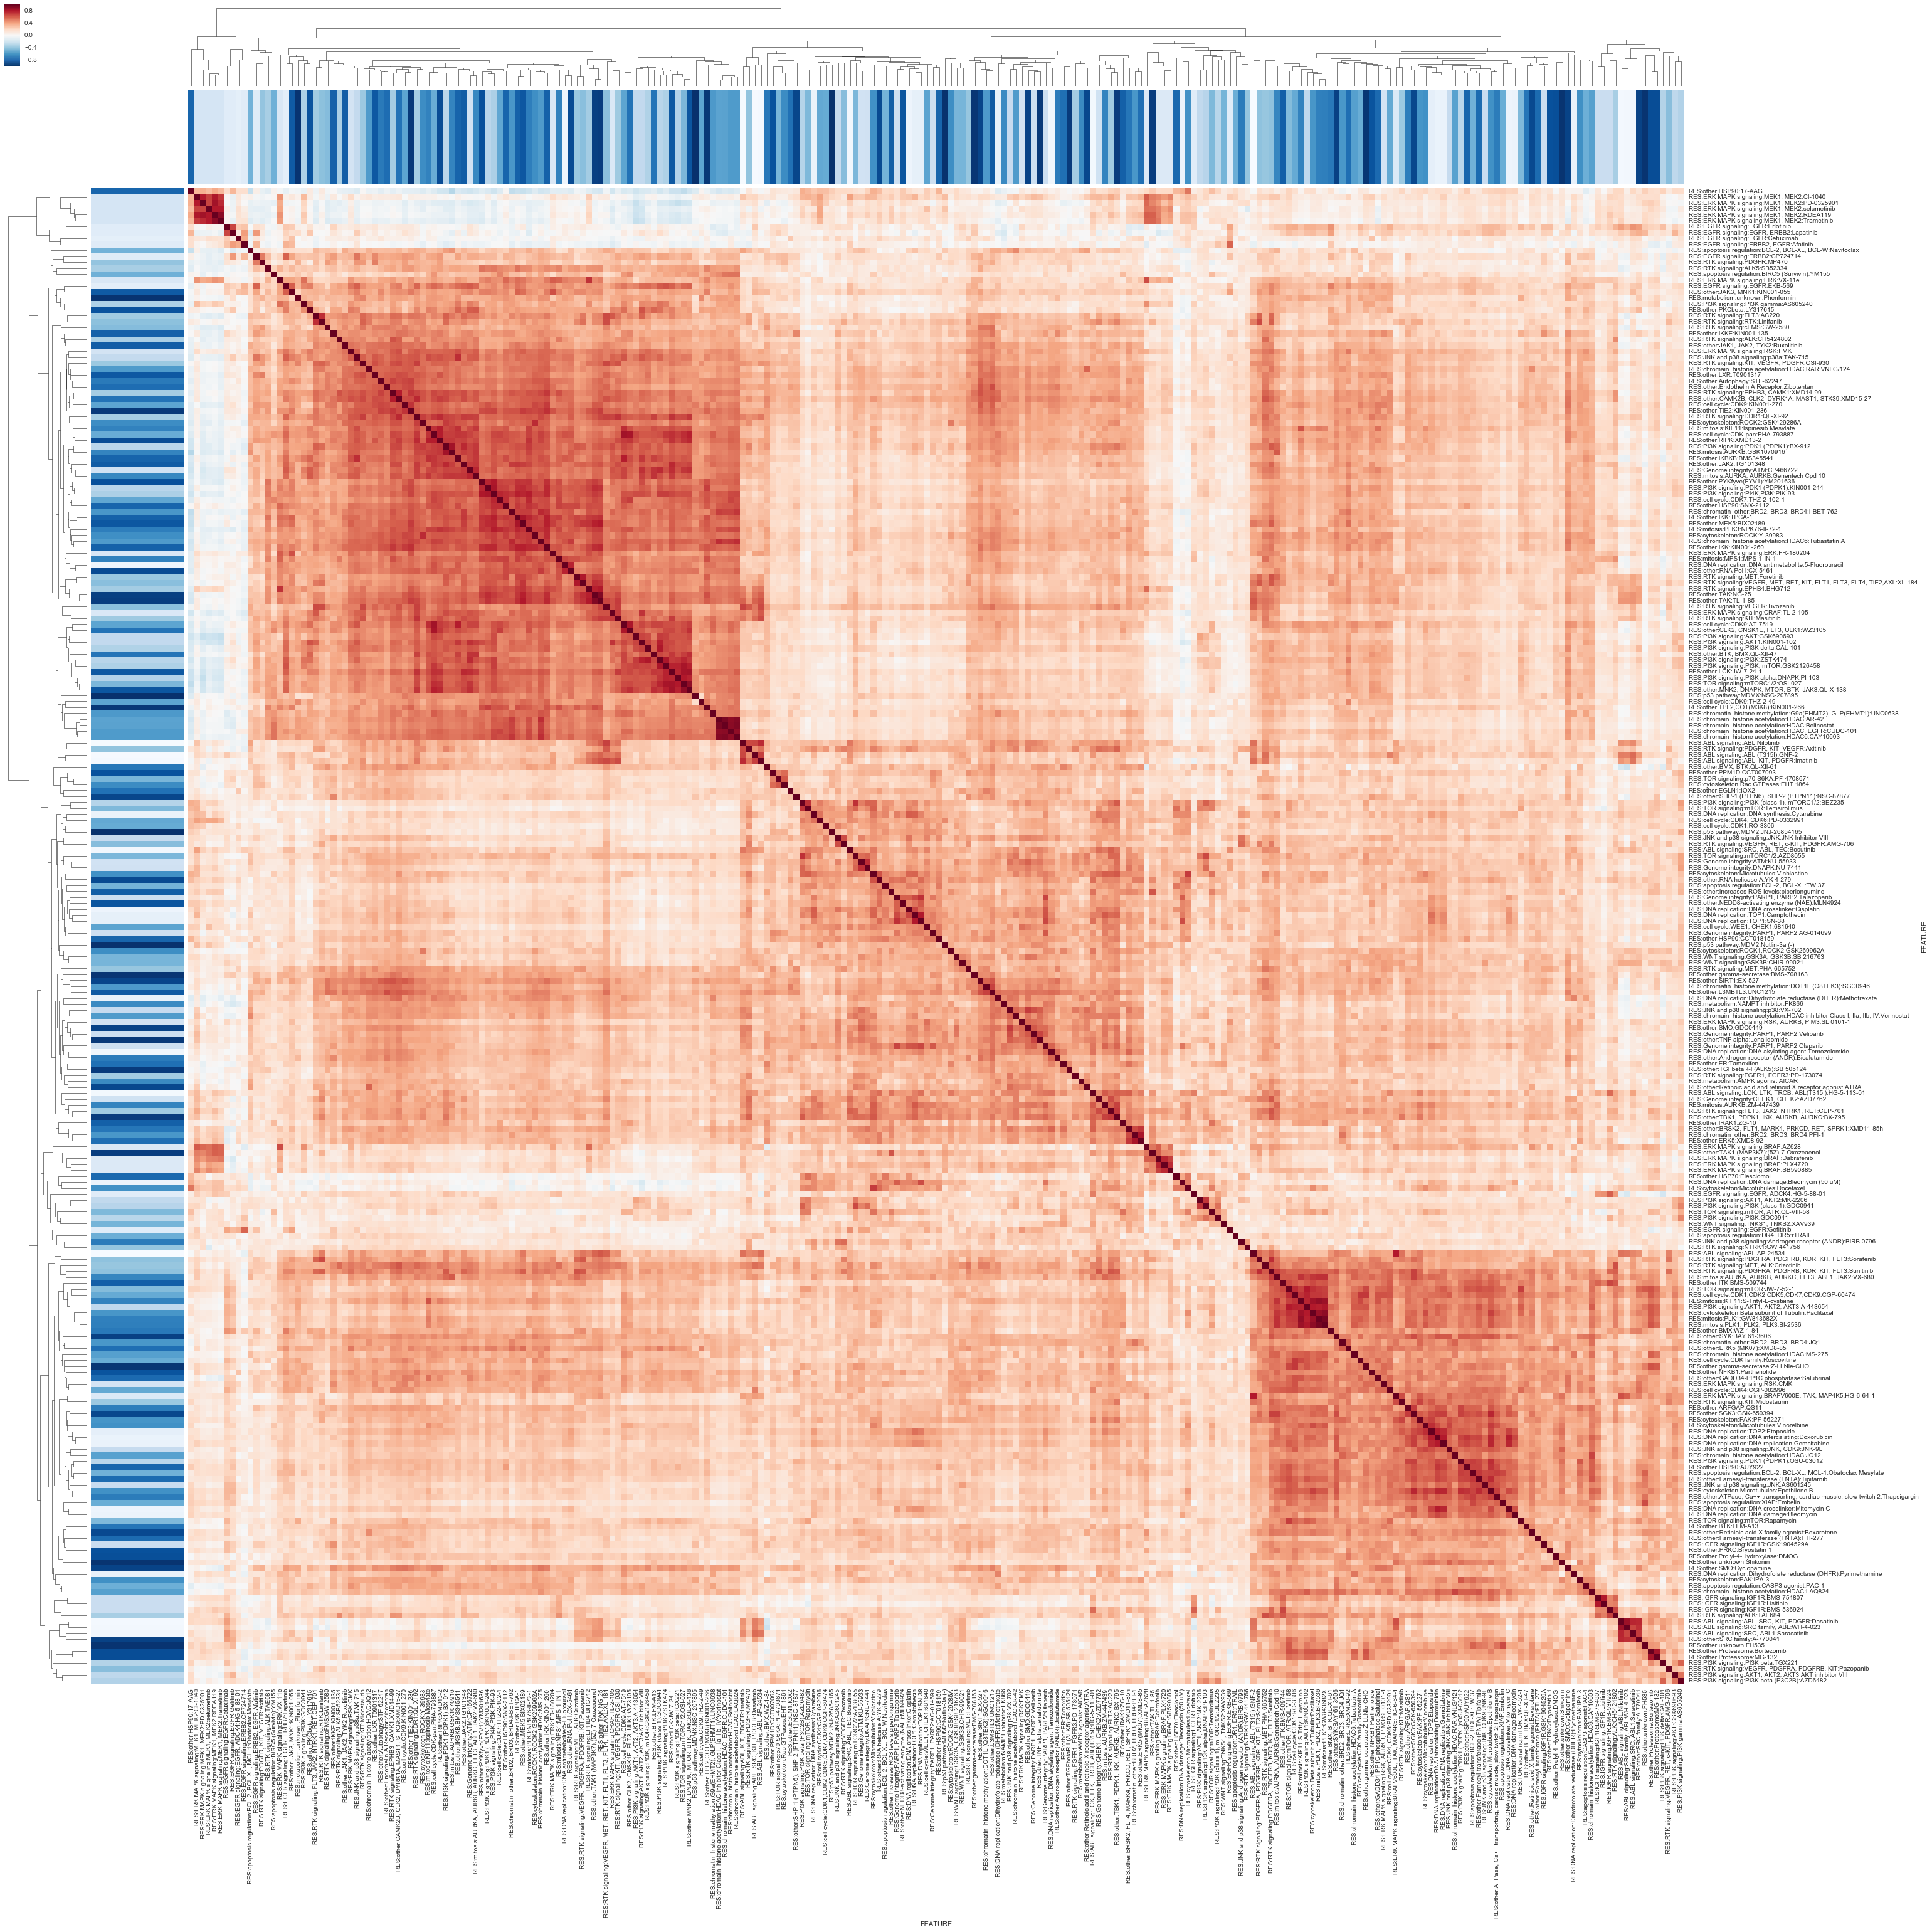

In [59]:
colors = sns.color_palette(palette='Blues', n_colors=len(targets))
colors = pd.Series(targets).map(dict(zip(targets, colors)))
cg = sns.clustermap(d_cor, figsize=(48, 48), row_colors=colors, col_colors=colors)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

In [62]:
cg.dendrogram_col.linkage.shape

(251, 4)